# Predicting Salary from Different City

In [276]:
import pandas as pd
import numpy as np
import sklearn

In [277]:
data = pd.read_csv('salary_data.csv',sep = ',')

In [278]:
data


,city,gender,salary
0,New York,M,20000.0
1,Mumbai,M,39000.0
2,Perth,F,NaN
3,Perth,M,40000.0
4,Mumbai,F,35000.0
5,Mumbai,F,35000.0
6,New York,F,31000.0


In [279]:
data.describe()

,salary
count,6.000000
mean,33333.333333
std,7284.687136
min,20000.000000
25%,32000.000000
50%,35000.000000
75%,38000.000000
max,40000.000000


In [280]:
#Discared the Dupliate value
data[data.duplicated()]

,city,gender,salary
5,Mumbai,F,35000.0


In [281]:
data = data.drop_duplicates()
data.index = range(len(data)) #to index properly
data

,city,gender,salary
0,New York,M,20000.0
1,Mumbai,M,39000.0
2,Perth,F,NaN
3,Perth,M,40000.0
4,Mumbai,F,35000.0
5,New York,F,31000.0


In [282]:
test_data = data.drop([0,1,2,3,4])
test_data

,city,gender,salary
5,New York,F,31000.0


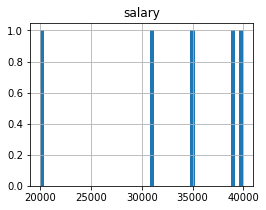

In [283]:
#Visualize the data
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(4,3))
plt.show()

# Handling Missing Data

In [284]:
# Fill the null values with the average
#A handy class to take care of missing values: Imputer

In [285]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

#Extracting the column with numeric data

data_num = data.drop(['city','gender'], axis=1)
data_num

,salary
0,20000.0
1,39000.0
2,NaN
3,40000.0
4,35000.0
5,31000.0


In [286]:
data_num.columns

Index(['salary'], dtype='object')

In [287]:
imputer.fit(data_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [288]:
#The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable

imputer.statistics_

array([ 35000.])

In [289]:
x = imputer.transform(data_num)

In [290]:
#The result is a plain Numpy array containing the transformed features. If you want to put it back into a Pandas DataFrame,
data_tr = pd.DataFrame(x, columns=data_num.columns)
data_tr

,salary
0,20000.0
1,39000.0
2,35000.0
3,40000.0
4,35000.0
5,31000.0


In [291]:
target = data_tr

In [292]:
# Encode ordinal label
data_cat = data.drop(['salary'], axis=1)
data_cat

,city,gender
0,New York,M
1,Mumbai,M
2,Perth,F
3,Perth,M
4,Mumbai,F
5,New York,F


In [293]:
# Encode ordinal label
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_cat['city'] = encoder.fit_transform(data_cat['city'])
data_cat['gender'] = encoder.fit_transform(data_cat['gender'])
data_cat

,city,gender
0,1,1
1,0,1
2,2,0
3,2,1
4,0,0
5,1,0


In [294]:
#Creating the test data
test_data['city'] = encoder.fit_transform(test_data['city'])
test_data['gender'] = encoder.fit_transform(test_data['gender'])
X_test = test_data
X_test = X_test.drop('salary', axis=1)
X_test

,city,gender
5,0,0


In [295]:
X, y =  data_cat, target

In [296]:
X_train, y_train = X[:5], y[:5]

In [297]:
X_train.shape

(5, 2)

In [298]:
X_test.shape

(1, 2)

In [299]:
y_train.shape

(5, 1)

In [300]:
#Prediction Using Linear Regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [301]:
print("Predictions:", lin_reg.predict(X_test))

Predictions: [[ 34750.]]


In [303]:
print("Expected : ", y[5:]) 

Expected :      salary
5  31000.0


In [304]:
# Evaluating regression model’s RMSE(Root Mean Squre Error)
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_test)
expected = y[5:]
lin_mse = mean_squared_error(expected, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3750.0

In [305]:
#Prediction Using Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [306]:
print("Predictions:", tree_reg.predict(X_test)) # Now the result is pretty good

Predictions: [ 35000.]


In [307]:
# RMSE for DecisionTreeRegressor
predictions = tree_reg.predict(X_test)
expected = y[5:] 
tree_mse = mean_squared_error(expected, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse 

4000.0